# Task 1: Get data

## 1 Load libs / Load turkish-se-SP500vsMSCI.csv  / Load mtcarsdata-4features.csv.csv dataset

In [1]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
# import traceback
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
sns.set_palette("tab10")

In [2]:
# Linear regression model without intercept is regression model just with a starting point at (0,,0)
turkishStock = pd.read_csv("../src/turkish-se-SP500vsMSCI.csv", sep=',', names=['x1', 'x2'])
print("THIS IS THE TURKISH STOCK EXCHANGE")
turkishStock[:5]

THIS IS THE TURKISH STOCK EXCHANGE


,x1,x2
0,-0.004679,0.012698
1,0.007787,0.011341
2,-0.030469,-0.017073
3,0.003391,-0.005561
4,-0.021533,-0.010989


In [3]:
# lubu dubu
# mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv", sep=',', names=['x1', 'x2'])
mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv",engine= "python", sep=' ,')
mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv", )
print("THIS IS THE MTCarsData")
mtCarsData[:5]

THIS IS THE MTCarsData


,Model,mpg,disp,hp,weight
0,Mazda_RX4,21.0,160.0,110,2.620
1,Mazda_RX4Wag,21.0,160.0,110,2.875
2,Datsun_710,22.8,108.0,93,2.320
3,Hornet_4_Drive,21.4,258.0,110,3.215
4,Hornet_Sportabout,18.7,360.0,175,3.440


# Task 2: Fit a linear regression model

### 2.1/2.2 One-dimensional problem without intercept on the Turkish stock exchange data
### Using least squares solution to linear regression problem
$w = \frac {\sum \limits _{l=1} ^{N} x_{l} t_{l}} {\sum \limits _{l=1} ^{N} x^2_{l}}   $

--- w equals =  0.6339446342595815  ---


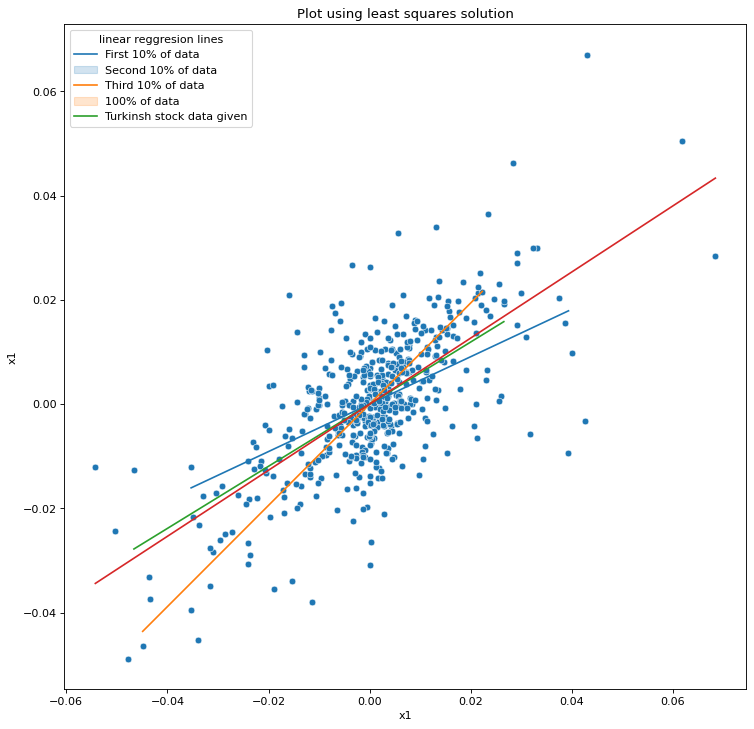

In [4]:
plt.figure(figsize= (11,11), dpi=80)
turkishStock_LinearOne = turkishStock
w = (turkishStock_LinearOne["x1"]*turkishStock_LinearOne["x2"])
w = w.sum() / (turkishStock_LinearOne["x1"]*turkishStock_LinearOne["x1"]).sum()
print("--- w equals = ", w, " ---")

for i in range(3):
    randomSubset1 = turkishStock_LinearOne.sample(frac=0.1)
    wSubset = (randomSubset1["x1"]*randomSubset1["x2"])
    wSubset = wSubset.sum()/(randomSubset1["x1"]**2).sum()
    sns.lineplot(
        y = randomSubset1["x1"]*wSubset,
        x = randomSubset1["x1"]
        )
# Plot with w calculated from 100% of data
sns.lineplot(
    y = turkishStock_LinearOne["x1"]*w,
    x = turkishStock_LinearOne["x1"]
    )
# Scatter plot with points with 100% of data
sns.scatterplot(
    data = turkishStock_LinearOne, x = "x1",
    y = "x2").set_title("Plot using least squares solution"
    )
plt.legend(title='linear reggresion lines', loc='upper left', labels=['First 10% of data', 'Second 10% of data', 'Third 10% of data', '100% of data', 'Turkinsh stock data given'])
plt.show()
# print(np.random.permutation(11)[:10])

## Bonus 1
### Linear Regression without intercept (probabably)- standarized data
#### Using standarizastion for negleting big changes in data

In [5]:
turkishStock_standarized = (turkishStock-turkishStock.mean())/turkishStock.std()
turkishStock_standarized[:5]

,x1,x2
0,-0.377679,0.941296
1,0.506880,0.836802
2,-2.207658,-1.350527
3,0.194996,-0.464321
4,-1.573588,-0.882155


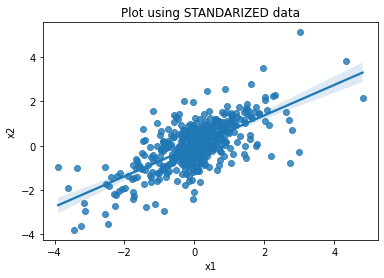

In [6]:
sns.regplot(data=turkishStock_standarized, x='x1', y='x2').set_title("Plot using STANDARIZED data")
plt.show()

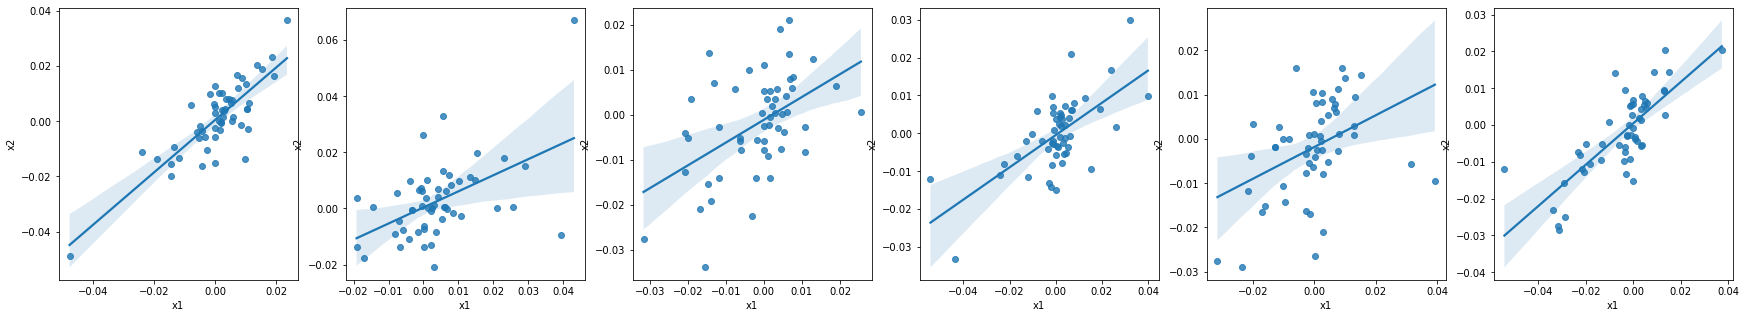

In [7]:
dataSampleTurkish = turkishStock_standarized.sample(frac=0.1)
# print("turkishStock_standarized",turkishStock_standarized.size)
# print("dataSampleTurkish",dataSampleTurkish.size)


# plt.show()
fig, axes = plt.subplots(1, 6, figsize=(30, 5))
# fig, axes = plt.subplots(1, 5, figsize=(15, 15), sharey=True)


for i in range (6):
    dataSampleTurkish = turkishStock.sample(frac=0.1)
    sns.regplot(ax= axes[i], data=dataSampleTurkish, x='x1', y='x2').set_label("Plots with random 10'%' data mean and 95'%' confidence interval")
# sns.regplot(ax= axes[6], data=turkishStock, x='x1', y='x2')
plt.show()
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

## 2.3 One-dimensional problem with intercept on the Motor Trends car data, using columns mpg and weight 

$w = \frac {\sum \limits _{l=1} ^{N} (x_{l} - \hat{x_{l}}) (t_{l} - \hat{x_{t}})} {\sum \limits _{l=1} ^{N} (x_{l} - \hat{x_{l}})^2}   $

Solution w1 to the one dimensional problem with intercept equals _> -5.344471572722676
Solution w0 to the one dimensional problem with intercept equals _> 37.285126167342035
    y = -5.344471572722676 x + 37.285126167342035


<Figure size 880x880 with 0 Axes>

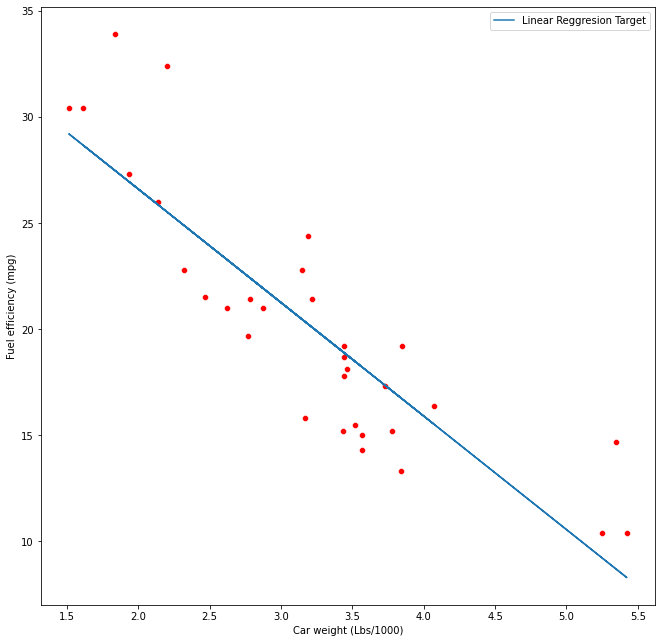

In [8]:
xEquation = mtCarsData[" weight"]
tEquation = mtCarsData[" mpg"]

calculatedWTop = 0
calculatedWBot = 0
calculatedW1 = 0
calculatedW0 = 0

for index , _ in enumerate(xEquation):
    calculatedWTop += (xEquation[index] - xEquation.mean())* (tEquation[index] - tEquation.mean())
    calculatedWBot += (xEquation[index] - xEquation.mean())**2

calculatedW1 = calculatedWTop/calculatedWBot
calculatedW0 = tEquation.mean() - calculatedW1 * xEquation.mean()

columnTarget = ((xEquation.to_numpy()*calculatedW1) + calculatedW0)

xEquation = xEquation.to_numpy()

plotToShow = {"Linear Reggresion Target" : columnTarget, "columnX" : xEquation}

DFplotToShow = pd.DataFrame(data=plotToShow)


print(f"Solution w1 to the one dimensional problem with intercept equals _> {calculatedW1}")
print(f"Solution w0 to the one dimensional problem with intercept equals _> {calculatedW0}")

sns.color_palette("husl", 8)
plt.figure(figsize= (11,11), dpi=80)
DFplotToShow.plot(x="columnX", y="Linear Reggresion Target", figsize=(11,11))


plotPoints = sns.scatterplot(x = xEquation, y = tEquation, color = 'r').set(xlabel = "Car weight (Lbs/1000)", ylabel = "Fuel efficiency (mpg)")
print(f"    y = {calculatedW1} x + {calculatedW0}")

## Bonus 2
### Using numpy auto linalg.lstsq (least squares method)

In [9]:

# np.append(xEquation, [0])


# print(xEquation[:5])
# print("mtCarsData[' hp']",xEquation.size)
# print("mtCarsData[' weight']",tEquation.size)

# xEquation = xEquation[:,np.newaxis]
# a, _, _, _ = np.linalg.lstsq(x, y, rcond=None)
# plt.plot(xEquation, tEquationy, 'bo')
# plt.plot(xEquation, a*xEquation, 'r-')

# plt.show()
# print(f"y = {a} x + 0")

## 2.4 Multi-dimensional problem on the complete MTcars data, using all four columns (predict mpg with the other three columns)
<!-- $w = \frac {\sum \limits _{l=1} ^{N} (x_{l} - \hat{x_{l}}) (t_{l} - \hat{x_{t}})} {\sum \limits _{l=1} ^{N} (x_{l} - \hat{x_{l}})^2}   $ -->
$w =  {X^T X}^{-1} (X^T)T   $ ~ Moore-Penrose pseudoinverse of X = X†
(Can use df_inv = pd.DataFrame(np.linalg.pinv(df.values), df.columns, df.index) for Moore-Penrose pseudoinverse)

In [10]:
# Assigning truthData as T and inputData as X
truthData = mtCarsData.iloc[:,1]
truthData = truthData.to_frame()
inputData = mtCarsData.iloc[:,2:5]

numpyAnwser = pd.DataFrame(np.linalg.pinv(inputData.values), inputData.columns, inputData.index)
# numpyAnwser = numpyAnwser.transpose()

w_MoorePenrosse = numpyAnwser.dot(truthData)
multiVarPredition = inputData.dot(w_MoorePenrosse)
# multiVarPredition = multiVarPredition.rename( columns= {"mpg": "Predicted Mpg"})


# print("This is the w calculated by MoorePenrosse:\n",w_MoorePenrosse)

# print("This is the prediction calculated by inputData * MoorePenrosse:\n", multiVarPredition)

# Calculationg the same by hand to test out

# inputInversed = inputData.transpose()
# inputInversed = inputInversed.dot(inputData)
# inputInversed = pd.DataFrame(np.linalg.inv(inputInversed.values), inputInversed.columns, inputInversed.index)
# inputInversed = inputInversed.dot(inputData.transpose())
# print(inputInversed.dot(truthData)) #This is the w calculated Moore-Penrosse method

finalComparisonDF = mtCarsData.join(multiVarPredition, rsuffix= "Predicted")
finalComparisonDF = finalComparisonDF[["Model", " disp", " hp", " weight", " mpg", " mpgPredicted"]]
print(finalComparisonDF)

                  Model   disp   hp   weight   mpg   mpgPredicted
0             Mazda_RX4  160.0  110    2.620  21.0      17.730038
1          Mazda_RX4Wag  160.0  110    2.875  21.0      20.806333
2            Datsun_710  108.0   93    2.320  22.8      19.442687
3        Hornet_4_Drive  258.0  110    3.215  21.4      13.455631
4     Hornet_Sportabout  360.0  175    3.440  18.7       7.098581
5               Valiant  225.0  105    3.460  18.1      20.048607
6            Duster_360  360.0  245    3.570  14.3      11.734448
7             Merc_240D  146.7   62    3.190  24.4      24.057253
8              Merc_230  140.8   95    3.150  22.8      25.710315
9              Merc_280  167.6  123    3.440  19.2      27.303982
10            Merc_280C  167.6  123    3.440  17.8      27.303982
11           Merc_450SE  275.8  180    4.070  16.4      24.757694
12           Merc_450SL  275.8  180    3.730  17.3      20.655966
13          Merc_450SLC  275.8  180    3.780  15.2      21.259162
14   Cadil

# Task 3: Test regression model

Re-run 1,3 and 4 from task 2 using only 5% of the data.

In [11]:
#Computing mean square error as function :  calculateMeanSquareError(Y_true, Y_pred)
def calculateMeanSquareError(Y_true, Y_pred):
    mse = np.square(np.subtract(Y_true,Y_pred)).mean()
    
    return mse

In [12]:
#Calculate taks 2.1 funcion task1Func(turStockData, percentOfData : float)
def task1MSE_W(turStockData , percentOfData : float):
    # Normal data stands for data delivered by {percentOfData}
    # Rest data stands for data thats left from substracting 100% - {percentOfData}
    # Test stands for testing {percentOfData} aproximations on the 100% - {percentOfData} dataset
    turkishStockFuncCalc = turStockData
    wFunc = (turkishStockFuncCalc["x1"]*turkishStockFuncCalc["x2"])
    wFunc = wFunc.sum() / (turkishStockFuncCalc["x1"]*turkishStockFuncCalc["x1"]).sum()
    # print("--- w of the whole set equals = ", w, " ---")

    # Creating dataset of {percentOfData}% capacity
    randomSubset = turkishStockFuncCalc.sample(frac=percentOfData)

    # Creating dataset of 100% - {percentOfData}% capacity
    dataToDtop = pd.DataFrame(randomSubset)
    restOfDataDF = pd.DataFrame(turkishStockFuncCalc).drop(dataToDtop.index)

    wOfSubset = (randomSubset["x1"]*randomSubset["x2"])
    wOfSubset = wOfSubset.sum()/(randomSubset["x1"]**2).sum()

    wOfRestOfData = (restOfDataDF["x1"]*restOfDataDF["x2"])
    wOfRestOfData = wOfRestOfData.sum()/(restOfDataDF["x1"]**2).sum()


    #   predictionsDF = predictionsDF.join((randomSubset["x1"]* wOfSubset), rsuffix= "Predicted_"+str(i)+"_")
    predictionsDF = pd.DataFrame({"Truth" : randomSubset["x2"], "LinearPrediction" : randomSubset["x1"] * wOfSubset})

    #   calculating objective/prediction for rest of the data
    predictionsDF_Rest = pd.DataFrame({"Truth_Rest" : restOfDataDF["x2"], "LinearPrediction_Rest" : restOfDataDF["x1"] * wOfRestOfData})

    #   calculating objective/prediction with w from {percentOfData} dataset with input from 100-{percentOfData} dataset
    predictionsDF_Test = pd.DataFrame({"Truth_Test" : restOfDataDF["x2"], "LinearPrediction_Test" : restOfDataDF["x1"] * wOfSubset})


    #   calculation mean square error for {percentOfData} 
    MeanSEE = calculateMeanSquareError(predictionsDF["Truth"], predictionsDF["LinearPrediction"])
    #   calculation mean square error for {restOfData} 
    MeanSEE_Rest = calculateMeanSquareError(predictionsDF_Rest["Truth_Rest"], predictionsDF_Rest["LinearPrediction_Rest"])
    #   calculation mean square error for {restOfData} with w of {percentOfData} dataset 
    MeanSEE_Test = calculateMeanSquareError(predictionsDF_Test["Truth_Test"], predictionsDF_Test["LinearPrediction_Test"])

    # sns.lineplot(
    #     y = randomSubset["x1"]*wOfSubset,
    #     x = randomSubset["x1"]
    #     )
    # listOfScatterPlots = []
    # listOfScatterPlots.append( sns.scatterplot(
    #     data = randomSubset, x = "x1", y = "x2"
    #     ).set_title("Plot using least squares solution"))

    return predictionsDF, MeanSEE, MeanSEE_Rest, MeanSEE_Test

$w = \frac {\sum \limits _{l=1} ^{N} (x_{l} - \hat{x_{l}}) (t_{l} - \hat{x_{t}})} {\sum \limits _{l=1} ^{N} (x_{l} - \hat{x_{l}})^2}   $


In [17]:
#Calculate taks 2.3 funcion task3Func(turStockData, percentOfData : float)
def task3MSE_Target(CarsDataFrame , percentOfData : float):
    CarsDataFrame = pd.DataFrame(data = CarsDataFrame)
    randomSubset = CarsDataFrame.sample(frac=percentOfData)
    restOfDataSubset = CarsDataFrame.drop(randomSubset.index)
    
    xEquation = randomSubset[" weight"]
    tEquation = randomSubset[" mpg"]
    xEquation_Rest = restOfDataSubset[" weight"]
    tEquation_Rest = restOfDataSubset[" mpg"]

    calculatedWTop = 0
    calculatedWBot = 0
    calculatedW1 = 0
    calculatedW0 = 0

    calculatedWTop_Rest = 0
    calculatedWBot_Rest = 0
    calculatedW1_Rest = 0
    calculatedW0_Rest = 0

    for index , _ in enumerate(xEquation):
        calculatedWTop += (xEquation.iloc[index] - xEquation.mean())* (tEquation.iloc[index] - tEquation.mean())
        calculatedWBot += (xEquation.iloc[index] - xEquation.mean())**2

    for index , _ in enumerate(xEquation_Rest):
        calculatedWTop_Rest += (xEquation_Rest.iloc[index] - xEquation_Rest.mean())* (tEquation_Rest.iloc[index] - tEquation_Rest.mean())
        calculatedWBot_Rest += (xEquation_Rest.iloc[index] - xEquation_Rest.mean())**2

    print("calculatedWTop\n", calculatedWTop)
    print("calculatedWBot\n", calculatedWBot)

    # calculating W1 and W0 for the target prediction
    calculatedW1 = calculatedWTop/calculatedWBot
    calculatedW0 = tEquation.mean() - calculatedW1 * xEquation.mean()

    calculatedW1_Rest = calculatedWTop_Rest/calculatedWBot_Rest
    calculatedW0_Rest = tEquation_Rest.mean() - calculatedW1_Rest * xEquation_Rest.mean()

    # calculating prediction Y
    columnTarget = ((xEquation.to_numpy()*calculatedW1) + calculatedW0)
    columnTarget_Rest = ((xEquation_Rest.to_numpy()*calculatedW1_Rest) + calculatedW0_Rest)
    columnTarget_Test = ((xEquation_Rest.to_numpy()*calculatedW1) + calculatedW0)

    MeanSEE =       calculateMeanSquareError(tEquation, columnTarget)
    MeanSEE_rest =  calculateMeanSquareError(tEquation_Rest, columnTarget_Rest)
    MeanSSE_test =  calculateMeanSquareError(tEquation_Rest, columnTarget_Test)
    
    return columnTarget, columnTarget_Rest, columnTarget_Test, MeanSEE, MeanSEE_rest, MeanSSE_test

In [14]:
#Calculate taks 2.4 funcion task4MSE_W(mtCarsData, percentOfData : float)
def task4MSE_W(CarsDataFrame , percentOfData : float):
    # Normal data stands for data delivered by {percentOfData}
    # Rest data stands for data thats left from substracting 100% - {percentOfData}
    # Test stands for testing {percentOfData} aproximations on the 100% - {percentOfData} dataset
    
    carsSampleLow = CarsDataFrame.sample(frac=percentOfData)
    carsSampleRest = CarsDataFrame.drop(carsSampleLow.index)

    truthData = carsSampleLow.iloc[:,1]
    truthData = truthData.to_frame()
    truthData_Rest = carsSampleRest.iloc[:,1]
    truthData_Rest = truthData_Rest.to_frame()

    inputData = carsSampleLow.iloc[:,2:5]
    inputData_Rest = carsSampleRest.iloc[:,2:5]

    numpyAnwser =       pd.DataFrame(np.linalg.pinv(inputData.values), inputData.columns, inputData.index)
    numpyAnwser_Rest =  pd.DataFrame(np.linalg.pinv(inputData_Rest.values), inputData_Rest.columns, inputData_Rest.index)

    #   Calculating the W
    w_MoorePenrosse =       numpyAnwser.dot(truthData)
    w_MoorePenrosse_Rest =  numpyAnwser_Rest.dot(truthData_Rest)

    #   making predictions
    multiVarPredition =         inputData.dot(w_MoorePenrosse)
    multiVarPredition_Rest =    inputData_Rest.dot(w_MoorePenrosse_Rest)
    multiVarPrediction_test =   inputData_Rest.dot(w_MoorePenrosse)

    # print("multiVarPredition_rest\n", multiVarPredition_Rest)
    # print("multiVarPrediction_test\n", multiVarPrediction_test)

    finalComparisonDF = carsSampleLow.join(multiVarPredition, rsuffix= "Predicted")
    finalComparisonDF = finalComparisonDF[["Model", " disp", " hp", " weight", " mpg", " mpgPredicted"]]

    finalComparisonDF_Rest = carsSampleRest.join(multiVarPredition_Rest, rsuffix= "Predicted")
    finalComparisonDF_Rest = finalComparisonDF_Rest[["Model", " disp", " hp", " weight", " mpg", " mpgPredicted"]]

    finalComparisonDF_Test = carsSampleRest.join(multiVarPrediction_test, rsuffix= "Predicted")
    finalComparisonDF_Test = finalComparisonDF_Test[["Model", " disp", " hp", " weight", " mpg", " mpgPredicted"]]

    # print("finalComparisonDF_Rest\n", finalComparisonDF_Rest)
    # print("finalComparisonDF_Test\n", finalComparisonDF_Test)

    #   calculation mean square error for {percentOfData} 
    MeanSEE =       calculateMeanSquareError(finalComparisonDF[" mpg"],         finalComparisonDF[" mpgPredicted"])
    MeanSEE_rest =  calculateMeanSquareError(finalComparisonDF_Rest[" mpg"],    finalComparisonDF_Rest[" mpgPredicted"])
    MeanSSE_test =  calculateMeanSquareError(finalComparisonDF_Test[" mpg"],    finalComparisonDF_Test[" mpgPredicted"])

    #   calculating objective/prediction for rest of the data

    # print("This is the predictionsDF\n", predictionsDF)
    return MeanSEE, MeanSEE_rest, MeanSSE_test, w_MoorePenrosse, w_MoorePenrosse_Rest, finalComparisonDF_Test

Re-runing task 1 

This is the Mean Square Error of first random subset:  9.478302460691967e-05
This is the Mean Square Error of first rest of the set:  8.846996321268519e-05
This is the Mean Square Error of from 100-percentOfData dataset:  8.881005953917972e-05


[Text(0.5, 0, 'Mean square error for model trained on 5% data (tested for 5%) (2000 samples)')]

<Figure size 1200x400 with 0 Axes>

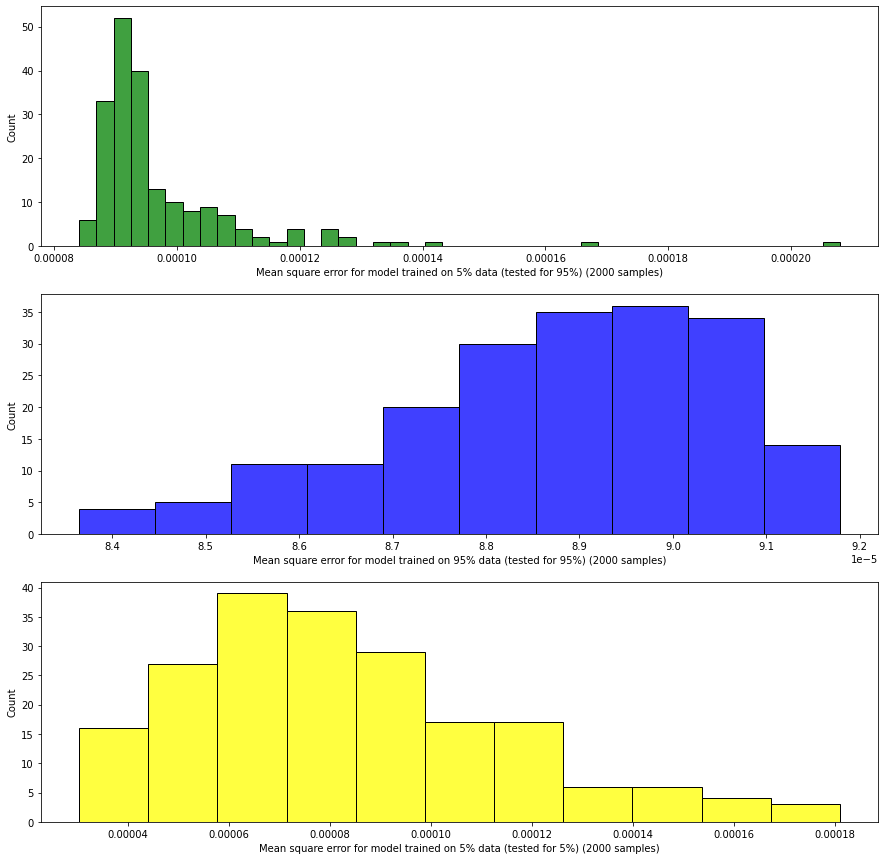

In [15]:
plt.figure(figsize= (15,5), dpi=80)


task1PredictionDF, meanSE1, meanSE1_Rest, meanSE1_Test = task1MSE_W(turkishStock, 0.05)
print("This is the Mean Square Error of first random subset: ", meanSE1)
print("This is the Mean Square Error of first rest of the set: ", meanSE1_Rest)
print("This is the Mean Square Error of from 100-percentOfData dataset: ", meanSE1_Test)
listOfmeanSE1_Test = []
listOfmeanSE1_Rest = []
listOfmeanSE1 = []


for taskCount in range(200):
    _, meanSE1, meanSE1_Rest, meanSE1_Test = task1MSE_W(turkishStock, 0.05)
    listOfmeanSE1_Test.append(meanSE1_Test)
    listOfmeanSE1_Rest.append(meanSE1_Rest)
    listOfmeanSE1.append(meanSE1)


chart1, ax1 = plt.subplots(3,1, figsize=(15, 15))
# chart2, ax2 = plt.subplots()
# chart3, ax3 = plt.subplots()

histPlotSE1_Test =  sns.histplot(data=listOfmeanSE1_Test, ax= ax1[0], color= "green") #.set_label("Mean square error for model trained on 5% data (tested for 95%)")
histPlotSE1_Rest =  sns.histplot(data=listOfmeanSE1_Rest, ax= ax1[1], color = "blue") #.set_label("Mean square error for model trained on 95% data (tested for 95%)")
histPlotSE1 =       sns.histplot(data=listOfmeanSE1, ax = ax1[2], color = "Yellow") # set_label("Mean square error for model trained on 5% data (tested for 5%)")
ax1[0].set(xlabel='Mean square error for model trained on 5% data (tested for 95%) (2000 samples)')
ax1[1].set(xlabel='Mean square error for model trained on 95% data (tested for 95%) (2000 samples)')
ax1[2].set(xlabel='Mean square error for model trained on 5% data (tested for 5%) (2000 samples)')


Re-runing task 3

In [18]:
_,_,_, MeanSE3, MeanSE3_Rest , MeanSE3_Test = task3MSE_Target(mtCarsData, 0.05)
print("This is MeanSE3\n",      MeanSE3)
print("This is MeanSE3_Rest\n", MeanSE3_Rest)
print("This is MeanSE3_Test\n", MeanSE3_Test)


for taskCount in range(200):
    _,_,_, MeanSE3, MeanSE3_Rest , MeanSE3_Test = task3MSE_Target(mtCarsData, 0.05)
    listOfmeanSE1_Test.append(MeanSE3_Test)
    listOfmeanSE1_Rest.append(MeanSE3_Rest)
    listOfmeanSE1.append(MeanSE3)


chart1, ax1 = plt.subplots(3,1, figsize=(15, 15))
# chart2, ax2 = plt.subplots()
# chart3, ax3 = plt.subplots()

histPlotSE1_Test =  sns.histplot(data=listOfmeanSE1_Test, ax= ax1[0], color= "green") #.set_label("Mean square error for model trained on 5% data (tested for 95%)")
histPlotSE1_Rest =  sns.histplot(data=listOfmeanSE1_Rest, ax= ax1[1], color = "blue") #.set_label("Mean square error for model trained on 95% data (tested for 95%)")
histPlotSE1 =       sns.histplot(data=listOfmeanSE1, ax = ax1[2], color = "Yellow") # set_label("Mean square error for model trained on 5% data (tested for 5%)")
ax1[0].set(xlabel='Mean square error for model trained on 5% data (tested for 95%) (2000 samples)')
ax1[1].set(xlabel='Mean square error for model trained on 95% data (tested for 95%) (2000 samples)')
ax1[2].set(xlabel='Mean square error for model trained on 5% data (tested for 5%) (2000 samples)')

calculatedWTop
 -3.055500000000001
calculatedWBot
 0.4704500000000002
This is MeanSE3
 5.048709793414476e-29
This is MeanSE3_Rest
 8.54069972739334
This is MeanSE3_Test
 23.477429606405163
calculatedWTop
 -4.237000000000002
calculatedWBot
 0.6216125000000002
calculatedWTop
 -7.135499999999999
calculatedWBot
 2.2684499999999996
calculatedWTop
 -0.1080000000000001
calculatedWBot
 0.03645000000000001
calculatedWTop
 -4.264200000000001
calculatedWBot
 1.718658000000001
calculatedWTop
 -1.444249999999998
calculatedWBot
 0.035112499999999915
calculatedWTop
 -3.2775
calculatedWBot
 0.23804999999999996
calculatedWTop
 0.24749999999999972
calculatedWBot
 0.15125000000000016
calculatedWTop
 0.5850000000000002
calculatedWBot
 0.1711125000000001
calculatedWTop
 -12.198
calculatedWBot
 1.2880125
calculatedWTop
 -0.16985000000000128
calculatedWBot
 0.0031205000000000494
calculatedWTop
 -0.2859999999999997
calculatedWBot
 0.008449999999999985
calculatedWTop
 -0.9039999999999997
calculatedWBot
 0.1596

C:\Users\szink\AppData\Local\Temp\ipykernel_23456\2287433516.py:34: RuntimeWarning: invalid value encountered in double_scalars
  calculatedW1 = calculatedWTop/calculatedWBot


 -5.844300000000002
calculatedWBot
 1.4348180000000008
calculatedWTop
 -13.853249999999997
calculatedWBot
 2.2366125
calculatedWTop
 -14.542000000000002
calculatedWBot
 3.495368000000002
calculatedWTop
 -2.4725
calculatedWBot
 0.5778124999999997
calculatedWTop
 -1.083749999999999
calculatedWBot
 0.8128124999999993
calculatedWTop
 -3.7760000000000007
calculatedWBot
 0.8191999999999997
calculatedWTop
 -2.4725
calculatedWBot
 0.5778124999999997
calculatedWTop
 0.6757500000000001
calculatedWBot
 0.03511250000000003
calculatedWTop
 -2.6244999999999994
calculatedWBot
 0.40951249999999983
calculatedWTop
 -6.437499999999999
calculatedWBot
 3.315312499999999
calculatedWTop
 -5.844300000000002
calculatedWBot
 1.4348180000000008
calculatedWTop
 -5.213999999999999
calculatedWBot
 0.8711999999999998
calculatedWTop
 -0.135
calculatedWBot
 0.03645000000000001
calculatedWTop
 -2.804499999999999
calculatedWBot
 0.31205000000000005
calculatedWTop
 -1.444249999999998
calculatedWBot
 0.035112499999999915


KeyboardInterrupt: 

Re-runing task 4 <br>
Remark: 5% of the data from mt cars are just two points resulting in almost 0 MSE for the same set

In [ ]:
meanSE4, meanSE4_Rest, meanSE4_Test, w2, w2_Rest, testingDataframeResult = task4MSE_W(mtCarsData, 0.05)
print("This is the Mean Square Error of first random subset: ", meanSE4)
print("This is the Mean Square Error of first rest of the set: ", meanSE4_Rest)
print("This is the Mean Square Error of 5% to 95% ratio: ", meanSE4_Test)
